# Deploying Machine Learning Models with PyTorch

In this notebook, you'll learn the fundamentals **behind machine learning** and how to **utilize** ML in your projects using PyTorch. After this workshop, you'll be able to utilize the vast collection of machine learning models created by the PyTorch community in your hackathon project.

## What is Machine Learning?

Machine learning is a field of computer science devoted to formulating algorithms that allow machines to **modify and learn behaviors**, rather than sticking to **explicitly programmed guidelines**.

### *Why is this useful?*

Imagine you wanted to recognize images of cats. For a human, this task is pretty straightforward — look for key **features** like ears, eyes, a nose, fur, etc. But a computer sees image data as just a massive array of pixel values.

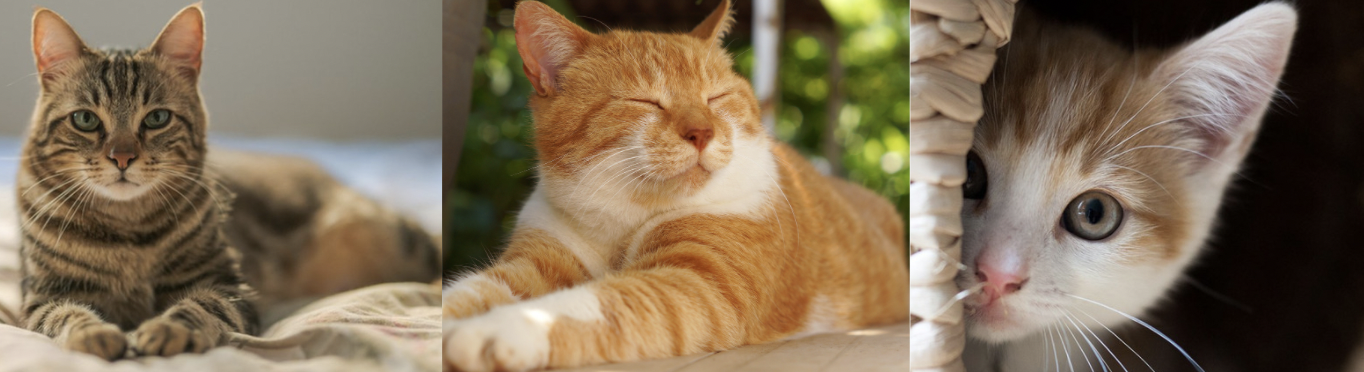



As you can see from the above three images of cats, the variation within different images of cats makes it **difficult to explicitly program guidelines** for a computer to recognize cats.

For example, the rightmost image only contains the head of the cat, unlike the other two images. All of the cats have different color fur, further complicating things.

## This is where ML comes in!

With machine learning, we can **train** the machine to discover its own **features** to look for when recognizing cats, meaning the machine is **learning the representation of a cat**.

## An Overview of ML

There are several types of machine learning settings — supervised learning settings like **classification**, **regression**, and unsupervised learning settings like **anomaly detection** and **generation**. 

For the purposes of this workshop, we'll be learning how to **build a simple image classifier using PyTorch.**

## How do ML models learn?

Most ML models learn from training data, using it to improve their predictions. Thus, the first requirement for any ML project is to find a high-quality source of data to use to train your model. It's crucial that you ensure your data is good — if you feed your model bad data, your model won't perform well.

Usually, the data is divided into **training data** and **test data**. The model is trained on the training data and evaluated on the test data. **NEVER TRAIN ON THE TEST DATA!** The whole point of the test data is to see how your model does on inputs it has never seen before.

A good analogy is a student at school — a student can learn from textbook problems, but the teacher doesn't know how well the student has learned just based off of that. Thus, the teacher gives **a test**, with problems the student has never seen, to see if the student knows **what's going on**, or is just **memorizing the answers**.

An ML model's performance is evaluated using what's known as a **cost function**, a mathematical function that measures how well the model is doing. A **higher** cost means the model is doing more poorly, while a **lower** cost means a more accurate model.

Then, the model undergoes a process known as **gradient descent** to improve its predictions based its previous performance. By using a bit of calculus, **gradient descent** will find the way to update the model that improves the model performance the most. By undergoing many iterations of gradient descent, the model's performance will improve until it can no longer improve, which is a **local optima**.

## Getting Started

Now, let's get started with training our own basic model. Firstly, you'll have to install `pytorch` and `torchvision`, as well as their dependencies. 

In [3]:
!pip install numpy ninja pyyaml mkl mkl-include setuptools cmake cffi typing_extensions future six requests matplotlib dataclasses torch torchvision

If you happen to have [Anaconda](https://https://www.anaconda.com/products/individual), you can simply use the below lines to install PyTorch and Matplotlib, a plotting library for Python. Anaconda is **highly recommended** if you're going to get into a lot of data science/ML in the future.

In [4]:
!conda install pytorch torchvision torchaudio -c pytorch
!conda install -c conda-forge matplotlib

/bin/bash: conda: command not found
/bin/bash: conda: command not found


To check your installation, try running the below lines:

In [5]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.2934, 0.5029, 0.8652],
        [0.1641, 0.5144, 0.5799],
        [0.8047, 0.3216, 0.9901],
        [0.7542, 0.4848, 0.6691],
        [0.1555, 0.7106, 0.8218]])


This code block should give you a random tensor (think an array) with five rows and three columns containing random floats between 0 and 1.

**Now, we can get into the actual machine learning!**

## Creating a Beginner MNIST Model

The [MNIST dataset](https://yann.lecun.com/exdb/mnist/) consists of photos of handwritten digits 0-9. The goal of this dataset is to create an ML model that can recognize handwritten digits. Let's start by first examining the dataset:

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch # Useful imports
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

'''
The transforms code basically takes the image data, converts it to a tensor 
so we can pass it to our model, and normalizes the data so it has mean of 0 and
standard deviation of 1. The normalization step is optional, but it usually 
leads to better model accuracy.
'''

transform=transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.1307,), (0.3081,))
      ])

'''
This function visualizes the image data for us. 
Credit to: https://github.com/sethjuarez/pytorchintro
'''
def draw_digits(digits):
    fig, axes = plt.subplots(6, 20, figsize=(18, 7),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        X, y = digits[i]
        ax.imshow(255 - X.reshape(28,28) * 255, cmap='gray')

# download both the training and testing sets for MNIST
train_set = datasets.MNIST('data', train=True, download=True, transform=transform)
test_set = datasets.MNIST('data', train=True, download=True, transform=transform)

# visualize a subset of the train set
draw_digits(train_set)

# wrap the datasets in DataLoaders so we can feed our data to the model
train_loader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=16)

KeyboardInterrupt: ignored

So above you can see that we're indeed dealing with handwritten digit data. Let's now define our ML model. We'll be using **convolutional** and **linear** layers in our model, which work especially well with image data. The details of these layers are beyond the scope of this workshop, but feel free to ask questions if you're interested.

In [ ]:
# Neural networks are defined using the torch.nn class in PyTorch
class Net(nn.Module):


    # Here, you can define the layers that will be your model
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1) # convolutional layer
        self.conv2 = nn.Conv2d(32, 64, 3, 1) # convolutional layer
        self.fc1 = nn.Linear(9216, 128) # linear layer
        self.fc2 = nn.Linear(128, 10) # linear layer
    '''
    Here, you pass a given input (x) through the layers you defined
    in __init__. Note the interspersed F.relu calls — these are 
    known as activation functions. These emulate biological neurons
    that fire/don't fire based on neurotransmitters. Basically, the
    relu function decides whether the neuron is considered "active" 
    or "inactive" based on the input x.
    '''
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2) # pooling operation 
        x = torch.flatten(x, 1) # redefining the dimensions of the input
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)

        '''
        Softmax returns the probabilities of the input being each class.
        Ex. A probability vector of [0.25, 0.5, 0.25, 0, 0, 0, 0, 0, 0, 0]
        means that the model thinks there is a 25% chance of the input being
        the digit 0, 50% chance of 1, 25% chance of 2, and no chance of the
        other digits.
        '''
        output = F.log_softmax(x, dim=1) 
        return output

Great! Now that we've defined our model, we can begin training our model. Don't worry too much about the specifics of the below code, but feel free to ask about it in-depth if you're interested in training your own models.

In [ ]:
def train(model, train_loader, optimizer, epoch):
    model.train() # set the model into train mode

    # loop through the training set
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data) # pass the input into the model
        loss = F.nll_loss(output, target) # calculate the cost for that input
        loss.backward()
        optimizer.step() # improve the model based on the current results
        if batch_idx % 100 == 0:
            # Fancy accuracy printout every 100 steps
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(model, test_loader):
    model.eval() # set the model into evaluation mode (not training)
    test_loss = 0
    correct = 0
    with torch.no_grad():

        # loop through the training set
        for data, target in test_loader:
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    # Fancy accuracy printout
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
'''
The below variables are known as hyperparameters. Hyperparameters are values
that are key to the success of the training procedure but cannot be inferred 
from the training data. In other words, you have to tune these values manually
to get the best model. Oftentimes, if your model is performing poorly, you
should try to improve your hyperparameters.
'''
learning_rate = 1.0
gamma = 0.7

model = Net()
optimizer = optim.Adadelta(model.parameters(), lr=learning_rate)

epoch = 1
#loop over the entire training set once
train(model, train_loader, optimizer, epoch)
test(model, test_loader)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309098
Train Epoch: 1 [1600/60000 (3%)]	Loss: 0.307985
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.016561
Train Epoch: 1 [4800/60000 (8%)]	Loss: 0.115723
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.527961
Train Epoch: 1 [8000/60000 (13%)]	Loss: 0.014695
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.124004
Train Epoch: 1 [11200/60000 (19%)]	Loss: 0.026168
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.155292
Train Epoch: 1 [14400/60000 (24%)]	Loss: 0.060006
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.003009
Train Epoch: 1 [17600/60000 (29%)]	Loss: 0.001500
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.016526
Train Epoch: 1 [20800/60000 (35%)]	Loss: 0.504195
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.057693
Train Epoch: 1 [24000/60000 (40%)]	Loss: 0.008914
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.022028
Train Epoch: 1 [27200/60000 (45%)]	Loss: 0.003549
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.085562
Train Epoch: 1 [30400/60000 (51%)]	Loss: 0.584728
Train Epoch: 1

Great! Just by training for several minutes, we've already gotten a model that can reach around **99% accuracy**. Not bad, huh? 

But the process of training larger, more complex ML models takes much longer. Modern-day ML models take hours, days, sometimes even weeks to train. For hackNEHS, it'll be pretty difficult to train a model from scratch in the given time frame. 

***So how can you use ML?***

## Utilizing Pretrained Models Using PyTorch

Fortunately, PyTorch has a platform called **PyTorch Hub**, where developers have published thousands of pretrained models on different tasks. With just a few lines of code, you can quickly download someone else's pretrained model and integrated it with your application. 

Here, we're going to use the [YOLOv5 model](https://github.com/ultralytics/yolov5), one of the state-of-the-art object detection models, and test it on an example image. 

In [1]:
import torch
from PIL import Image
from matplotlib.pyplot import imshow

# Load the pretrained model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Download an example image to test on
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/zidane.jpg', 'zidane.jpg')

test_image = Image.open('zidane.jpg')  # PIL image

# Pass the model through the pretrained model
results = model(test_image, size=640)

# Show the resulting image
results.save(save_dir='results/')
test_image = Image.open('results/zidane.jpg')
%matplotlib inline
imshow(np.asarray(test_image))

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


KeyboardInterrupt: ignored

As you can see, we're able to quickly grab a pretrained model and use it in our application in just minutes! Check out https://pytorch.org/hub/ for available pretrained models on PyTorch Hub.

## Summary

In today's workshop, we learned the fundamentals of machine learning models – why we use them, how they work, and how to use them in our projects. You learned how to both create your own models using PyTorch and quickly utilize pretrained models from PyTorch Hub.

***Thanks! Questions?***